In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi
import seaborn as sns
import matplotlib.image as mpimg
import requests
%matplotlib inline

In [2]:
from IPython.display import Image
from IPython.core.display import HTML

In [3]:
players = pd.read_csv('data.csv')
position = pd.read_csv('position.csv', sep=';')
stats = pd.read_excel('stats.xls')

In [4]:
players = players.reset_index()
players.drop('Unnamed: 0', axis=1, inplace=True)
statistics = stats[['stats', 'stats_type']]

In [5]:
inicioDf = players.shape[0]
totalPosiciones = position.shape[0]
totalEstadisticas = stats.shape[0]

In [6]:
players = players.dropna(subset=['Club', 'Position'])

In [7]:
limpiarClubPosicionesDf = players.shape[0]

In [8]:
totalDeNuloAntes = (players.isnull().sum()).sum()

In [9]:
players['Release Clause'] = players['Release Clause'].fillna('No data')
players['Loaned From'] = players['Loaned From'].fillna('No data')
players['Release Clause'] = players['Release Clause'].fillna('No data')
players['Joined'] = players['Joined'].fillna('No data')

In [10]:
players = players.fillna(0)

In [11]:
totalDeNuloDsp = (players.isnull().sum()).sum()

In [12]:
inicioDf, totalPosiciones, totalEstadisticas, limpiarClubPosicionesDf, totalDeNuloAntes, totalDeNuloDsp

(18207, 27, 35, 17918, 70985, 0)

In [13]:
players.columns.to_frame().to_excel('columnas.xlsx')

In [14]:
(players.isnull().sum()).sum()

0

In [15]:
players = players.reset_index()

In [16]:
rows_list = []

for x in range (0, 17918):
    jugador = players.Name[players.ID == players.ID[x]].to_string(index=False)
    bandera = players.Flag[players.ID == players.ID[x]].to_string(index=False)
    club = players.Club[players.ID == players.ID[x]].to_string(index=False)
    defending = round((players[players.ID == players.ID[x]][['Marking', 'StandingTackle', 'SlidingTackle']].mean()).mean())
    general = round((players[players.ID == players.ID[x]][['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].mean()).mean())
    mental = round((players[players.ID == players.ID[x]][['Aggression', 'Interceptions', 'Positioning', 'Vision','Composure']].mean()).mean())
    passing = round((players[players.ID == players.ID[x]][['Crossing', 'ShortPassing', 'LongPassing']].mean()).mean())
    mobility = round((players[players.ID == players.ID[x]][['Acceleration', 'SprintSpeed', 'Agility', 'Reactions']].mean()).mean())
    power = round((players[players.ID == players.ID[x]][['Balance', 'Jumping', 'Stamina', 'Strength']].mean()).mean())
    rating = round((players[players.ID == players.ID[x]][['Potential', 'Overall']].mean()).mean())
    shooting = round((players[players.ID == players.ID[x]][['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower', 'LongShots', 'Penalties']].mean()).mean())
    
    rows_list.append([jugador, defending, general, mental, passing, mobility, power, rating, shooting, bandera, club])


In [17]:
data = pd.DataFrame(rows_list)

In [18]:
data.rename(columns={0:'Jugador',
                    1:'Defending',
                    2:'General',
                    3:'Mental',
                    4:'Passing',
                    5:'Mobility',
                    6:'Power',
                    7:'Rating',
                    8:'Shooting',
                    9:'Flag',
                    10: 'Club'}, 
                     inplace=True)

In [19]:
def detalle(row, title, image, club):
    
    nombre_local_imagen = "goDos.jpg"
    imagen = requests.get(image).content
    with open(nombre_local_imagen, 'wb') as handler:
        handler.write(imagen)
        
    color = '#80cbc4'

    img = mpimg.imread('goDos.jpg')
    
    plt.figure(figsize=(15,8))
    
    categories=list(data)[1:]
    
    categories.remove('Flag')  
    categories.remove('Club')
    
    N = len(categories)
   
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(111, projection='polar')

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= "black", size=22)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color="grey", size= 10)
    plt.ylim(0,100)
    
    values = data.loc[row].drop('Jugador').values.flatten().tolist() 
    
    values.remove(values[8])
    values.remove(values[8])
    
    values += values[:1]
    
    ax.plot(angles, values, color= "black", linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= color, alpha=0.5)
    
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    plt.title(title, size=50, color= "black")
    plt.suptitle(club, fontsize=12)

In [20]:
def graficar(id):
    if 0 <= id < len(players.ID):
        detalle(row = data.index[id] , title = data['Jugador'][id], club = data['Club'][id], image = data['Flag'][id])
    else:
        print('La base cuenta con 17917 jugadores. Podes poner numero positivos del 0 al 17917')       

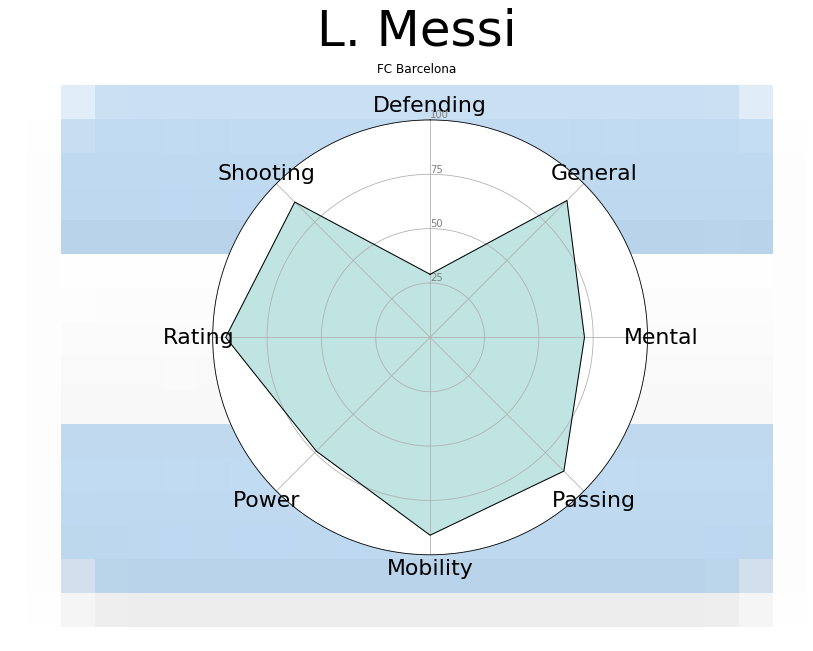

In [22]:
graficar(0)